# 1. Import Required Libraries

Taken from https://www.kaggle.com/code/mehmetisik/sales-pred-linear-regression-learning-exercise, all the credits for this colab should be attributed to Mehmet Isik.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Adjusting Row Column Settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. Loading the data Set

In [3]:
df = pd.read_csv("/kaggle/input/advertisingcsv/advertising.csv")

# 4. Exploratory Data Analysis

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(200, 4)
##################### Types #####################
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
##################### Head #####################
       TV  radio  newspaper  sales
0 230.100 37.800     69.200 22.100
1  44.500 39.300     45.100 10.400
2  17.200 45.900     69.300  9.300
3 151.500 41.300     58.500 18.500
4 180.800 10.800     58.400 12.900
##################### Tail #####################
         TV  radio  newspaper  sales
195  38.200  3.700     13.800  7.600
196  94.200  4.900      8.100  9.700
197 177.000  9.300      6.400 12.800
198 283.600 42.000     66.200 25.500
199 232.100  8.600      8.700 13.400
##################### NA #####################
TV           0
radio        0
newspaper    0
sales        0
dtype: int64
##################### Quantiles #####################
           0.000  0.050   0.500   0.950   0.990   1.000
TV         0.700 13.195 149.750 2

# 4. Simple Linear Regression with OLS Using Scikit-Learn

In [5]:
# Modelling

In [6]:
# Dependent variable
y = df[["sales"]]

# Independent variable
X = df[["TV"]]

In [7]:
# The model object was created and fit was done.
reg_model = LinearRegression().fit(X, y)

In [8]:
reg_model.intercept_[0]

7.032593549127695

In [9]:
reg_model.coef_[0][0]

0.04753664043301975

In [10]:
# y_hat = b + w*TV

# y_hat = reg_model.intercept_[0] + reg_model.coef_[0][0] * TV

# y_hat = 7.032593549127693 + 0.047536640433019764 * TV

In [11]:
# Prediction

In [12]:
# How much sales would be expected if there were 150 units of TV spending?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [13]:
# How much sales would there be if there were 500 units of TV spending?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637567

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.000,147.042,85.854,0.700,74.375,149.750,218.825,296.400
radio,200.000,23.264,14.847,0.000,9.975,22.900,36.525,49.600
newspaper,200.000,30.554,21.779,0.300,12.750,25.750,45.100,114.000
sales,200.000,14.023,5.217,1.600,10.375,12.900,17.400,27.000


In [15]:
# Visualization of the Model

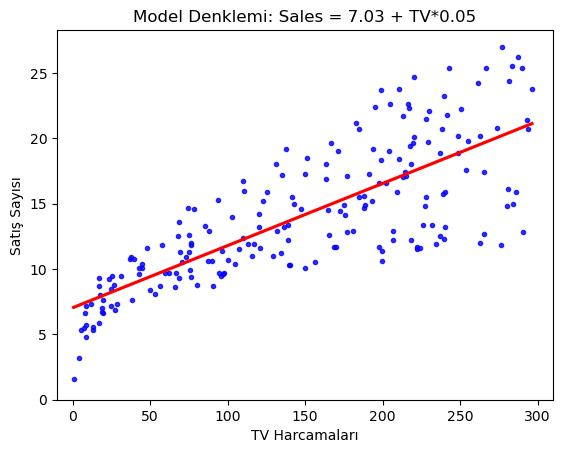

In [16]:
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")

g.set_ylabel("Satış Sayısı")

g.set_xlabel("TV Harcamaları")

plt.xlim(-10, 310)

plt.ylim(bottom=0)

plt.show(block=True)

In [17]:
# Prediction Success

In [18]:
# MSE

In [19]:
y_pred = reg_model.predict(X)

In [20]:
mean_squared_error(y, y_pred)

10.512652915656757

In [21]:
y.mean()

sales   14.023
dtype: float64

In [22]:
y.std()

sales   5.217
dtype: float64

In [23]:
# RMSE

In [24]:
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [25]:
# MAE

In [26]:
mean_absolute_error(y, y_pred)

2.549806038927486

In [27]:
# R-KARE

In [28]:
reg_model.score(X, y)

0.611875050850071

# 5. Multiple Linear Regression

In [29]:
# Loading the data Set

In [30]:
dff = pd.read_csv("/kaggle/input/advertisingcsv/advertising.csv")

In [31]:
# Modelling

In [32]:
# Dependent variable
y = df[["sales"]]

# Independent variable
X = df.drop('sales', axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [34]:
X_train.shape

(160, 3)

In [35]:
X_test.shape

(40, 3)

In [36]:
y_test.shape

(40, 1)

In [37]:
y_train.shape

(160, 1)

In [38]:
# The model object was created and fit was done.
reg_model = LinearRegression()

In [39]:
reg_model.fit(X_train, y_train)

LinearRegression()

In [40]:
# constant (b - bias)

reg_model.intercept_[0]

2.907947020816433

In [41]:
# coefficients (w - weights)

reg_model.coef_[0][0]

0.04684310317699042

In [42]:
# Prediction

In [43]:
# What is the expected value of the sale according to the following observation values?

# TV: 30
# radio: 10
# newspaper 40

# Model Equation
# y_pred = b + w*xi
# Sales = 2.907947020816433 + TV * 0.04684310317699042 + radio * 0.17854434 + newspaper * 0.00258619

2.907947020816433 + 30 * 0.04684310317699042 + 10 * 0.17854434 + 40 * 0.00258619

6.202131116126146

In [44]:
new_data = [[30], [10], [40]]

In [45]:
new_data = pd.DataFrame(new_data).T

In [46]:
reg_model.predict(new_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [47]:
# Prediction Success

In [48]:
# Train RMSE

y_pred = reg_model.predict(X_train)

np.sqrt(mean_squared_error(y_train, y_pred))

reg_model.score(X_train, y_train)

0.8959372632325174

In [49]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

reg_model.score(X_test, y_test)

0.8927605914615384

In [50]:
# 10 Fold CV RMSE

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

1.6913531708051797

In [51]:
# 5 Fold CV RMSE

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

1.7175247278732086

# 6. Simple Linear Regression with Gradient Descent from Scratch

In [52]:
# Cost function MSE

def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0 # sum of square error(hata kareler toplamı)

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m # m gözlem sayısı
    return mse

In [53]:
# update_weights

def update_weights(Y, b, w, X, learning_rate): # learning_rate öğrenme hızı
    m = len(Y)

    b_deriv_sum = 0
    w_deriv_sum = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]

    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [54]:
# Train function

def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [55]:
dfff = pd.read_csv("/kaggle/input/advertisingcsv/advertising.csv")

In [56]:
Y = dfff["sales"]

In [57]:
X = dfff["radio"]

In [58]:
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

In [59]:
cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25